In [1]:
# to generate Fig 5.1 in Reinforcement Learning by Andrew Barto and Richard S. Sutton
# Ch.5 Monte-Carlo prediction, algorithm: First-visit MC prediction
# gym api is used
import gym
import numpy as np
import matplotlib.pyplot as pl
# importing Black-Jack game API
env = gym.make('Blackjack-v0')

An observation in `Blackjack` consists of 
 1. player's sum 
 2. dealer's face-up card
 3. if player is natural or not

In [2]:
def get_state_as_string(state):
    """ Convert the given observation into string of form
    [][][][][][]
    """
    string_state = ''.join(str(int(e)).zfill(2) for e in state)
    return string_state

In [3]:
def get_all_states_as_string():
    """ Function to generate all possible states and assign a 
    string to each states 
    ex: (20, 8, False) --> 200800
    """
    states = []
    for i in range(1, 33):
        for j in range(1,12):
            for k in [False, True]:
                states.append(str(int(i)).zfill(2) + str(int(j)).zfill(2) + 
                              str(int(k)).zfill(2))
    return states

In [4]:
# initialize state value
def initialize_Q():
    """ Initialize the state value dictionary,
    and state counter dictionary
    """
    Q = {}
    Cnt = {}
    all_states = get_all_states_as_string()
    for state in all_states:
        Q[state] = 0
        Cnt[state] = 0 # number of occurances of a state
    return Q, Cnt

In [5]:
def policy(observation):
    """ Generate an action based on previous
    state. Stick if sum is 20 or 21
    """
    if observation[0] >= 20 :
        action = 0
    else:
        action = 1
    return action

Implementing first visit Monte-Carlo for estimating state value $v_{\pi}(s)$ according to  policy $\pi$.
Since in BlackJack game, every state is visited only once, there is no need to check if it is a first visit.

In [6]:
# Monte-Carlo simulation 
def MC_stateValue():    
    Q, Cnt = initialize_Q()
    for _ in range(1000000):
        # policy: stick just when the player sum is 20 or 21
        done = False
        observation = env.reset()
        while not done:
            action = policy(observation)
            observation, reward, done, _ = env.step(action)
            state = get_state_as_string(observation)
            Q[state] += reward
            Cnt[state] += 1
    return Q, Cnt


In [7]:
Q, Cnt = MC_stateValue()

In [8]:
QQ, _ = initialize_Q()
for state in get_all_states_as_string():
    if not Cnt[state] == 0:
        QQ[state] = Q[state]/Cnt[state]
    else:
        QQ[state] = 0

In [9]:
# return the player's sum and dealer's face-up card
def strToarr(q):
    """Return the player's sum and dealer's face-up card"""
    return int(q[0:2]), int(q[2:4])
    

In [10]:
strToarr('200800')

(20, 8)

In [11]:
# plotting
# state value for player sum in [11, 21] and dealer card in [11,21]
def stateV_convertor(QQ):
    """ Convert dict QQ to a np.array, the range of player sum is 
    [11,21], and dealer card [1,10]"""
    Qarr = np.zeros((11, 11), dtype=float)
    for state in QQ:
        idx0,idx1 = strToarr(state)
        if (idx0 >= 11 and idx0 <= 21):
            Qarr[idx0-11, idx1-1] = QQ[state]
    return Qarr        

In [12]:
Qarr = stateV_convertor(QQ)

In [13]:
from mpl_toolkits.mplot3d import Axes3D

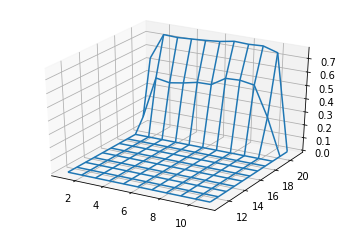

In [14]:
fig = pl.figure()
ax = fig.add_subplot(111, projection='3d')
y = np.linspace(11,21,11)
x = np.linspace(1,11, 11)
X, Y = np.meshgrid(x,y)
ax.plot_wireframe(X, Y, Qarr, antialiased=True)